### 지역별 데이터 저장하기 (예제파일: age_2.csv)
- OS 모듈 https://dotsnlines.tistory.com/514
> * 파일명 가져오기 : os.listdir(폴더경로)
> * 폴더 생성:os.mkdir(폴더명)
> * 폴더 or 파일 존재 확인: os.path.exists('경로') => 폴더나 파일이 존재할때 'True' 반환

**[작업순서]**
1. age2.csv 불러와서 **"지역"**열로 index 설정
2. 현재 폴더 아래 '지역'폴더 만들고 (os.mkdir) 지역별 데이터 저장하기
3. 각 지역별 구별 데이터 저장하기


### 1. age2.csv 불러와서 **"지역"**열로 index 설정

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('./age_2.csv',encoding='cp949')

In [3]:
df.head(3)

,지역,0세,1세,2세,3세,4세,5세,6세,7세,8세,...,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상,행정구역코드
0,서울특별시,0.005500,0.006100,0.006736,0.007239,0.007168,0.007062,0.007817,0.007548,0.007741,...,0.000550,0.000407,0.000300,0.000288,0.000231,0.000160,0.000121,0.000090,0.000607,1100000000
1,서울특별시 종로구,0.003879,0.004468,0.005069,0.005717,0.005573,0.005645,0.006692,0.005913,0.006620,...,0.000863,0.000733,0.000517,0.000451,0.000530,0.000347,0.000262,0.000255,0.001544,1111000000
2,서울특별시 종로구 청운효자동,0.005073,0.006072,0.005534,0.007533,0.007533,0.007225,0.008301,0.008378,0.008839,...,0.000615,0.001076,0.000461,0.000538,0.000692,0.000307,0.000154,0.000154,0.001230,1111051500


In [4]:
# '지역'으로 index설정
df=df.set_index('지역')

In [5]:
df.head(3)

,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,...,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상,행정구역코드
지역,,,,,,,,,,,,,,,,,,,,,
서울특별시,0.005500,0.006100,0.006736,0.007239,0.007168,0.007062,0.007817,0.007548,0.007741,0.007184,...,0.000550,0.000407,0.000300,0.000288,0.000231,0.000160,0.000121,0.000090,0.000607,1100000000
서울특별시 종로구,0.003879,0.004468,0.005069,0.005717,0.005573,0.005645,0.006692,0.005913,0.006620,0.006037,...,0.000863,0.000733,0.000517,0.000451,0.000530,0.000347,0.000262,0.000255,0.001544,1111000000
서울특별시 종로구 청운효자동,0.005073,0.006072,0.005534,0.007533,0.007533,0.007225,0.008301,0.008378,0.008839,0.007302,...,0.000615,0.001076,0.000461,0.000538,0.000692,0.000307,0.000154,0.000154,0.001230,1111051500


### 2. 현재 폴더 아래 '지역'폴더 만들어 지역별 데이터 저장
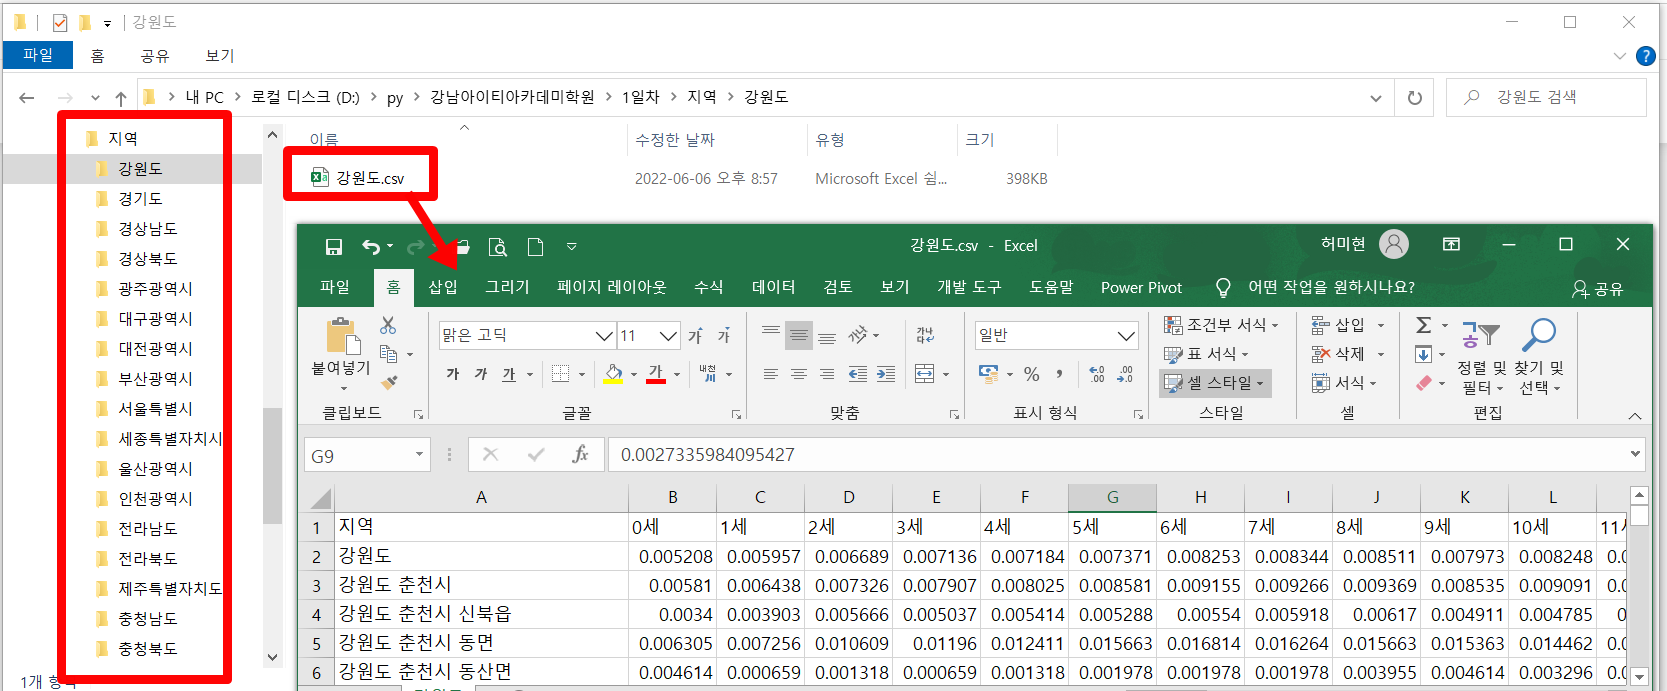

In [6]:
pwd #현재경로확인

'd:\\py\\강남아이티아카데미학원\\1일차'

In [28]:
import os
#지역 폴더 생성
if not(os.path.exists('지역')):
    os.mkdir('지역') #지역 폴더 생성

In [38]:
# 지역 추출
tmp=df.index
addr1=tmp.str.split().str[0].unique()
addr1

Index(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도',
       '제주특별자치도'],
      dtype='object', name='지역')

In [144]:
# 지역 데이터 추출하고 각 지역 폴더 만든후 csv로 저장하기
path='지역/'
for i in addr1:
    forder=path+i
    if not(os.path.exists(forder)):
        os.mkdir(forder)
    tmp=df[df.index.str.contains(i)]
    tmp.to_csv(f'{forder}/{i}.csv',encoding='cp949')


### 3. 각 지역별 구별 데이터 저장하기
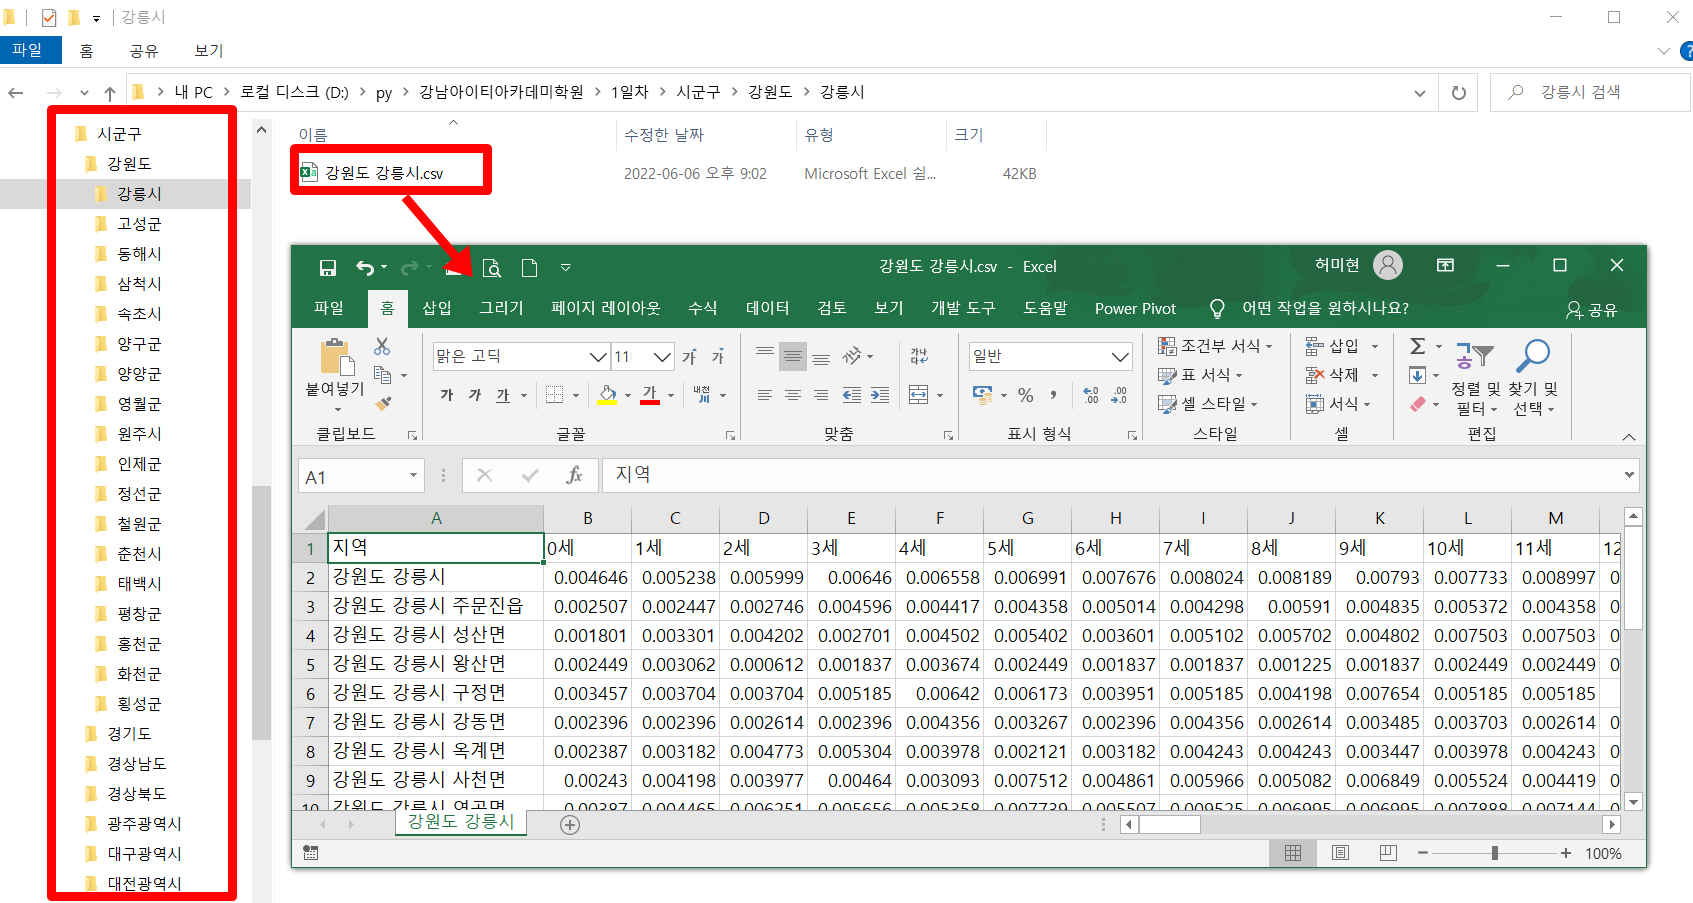

In [151]:
# 각 지역의 구를 추출
tmp=df.index
addr1=tmp.str.split().str[0].unique() #시 추출

addr2=[] # 각 시별 구 추출
for i in addr1:
    a=tmp[tmp.str.contains(i)]
    #print(a)
    a_1=(a.str.split().str[1]).unique()[1:]
    addr2.append(a_1)



# 시군구 폴더 생성
forder='시군구/'
if not(os.path.exists(forder)):
    os.mkdir(forder)

#시군구 아래 각 시별 구 폴더를 만들고 해당 자료 저장하기
for i,c in zip(addr1,addr2):
    forder_1=forder+i+'/'
    if not(os.path.exists(forder_1)):
        os.mkdir(forder_1)  #시군구 아래 각 시 폴더 생성

    for j in c :
        forder_2=forder_1+j+'/'
      
        if not(os.path.exists(forder_2)):
            os.mkdir(forder_2) # 각 시 폴더 아래 구 폴더 생성
        df_1=df[df.index.str.contains(j)]
        df_1.to_csv(f'{forder_2}/{i} {j}.csv',encoding='cp949')

